In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
sns.set()


In [2]:
df = pd.read_csv('../data/final/final_df.csv')

In [3]:
X = df["processed_text"].astype(str)
y = df['label']

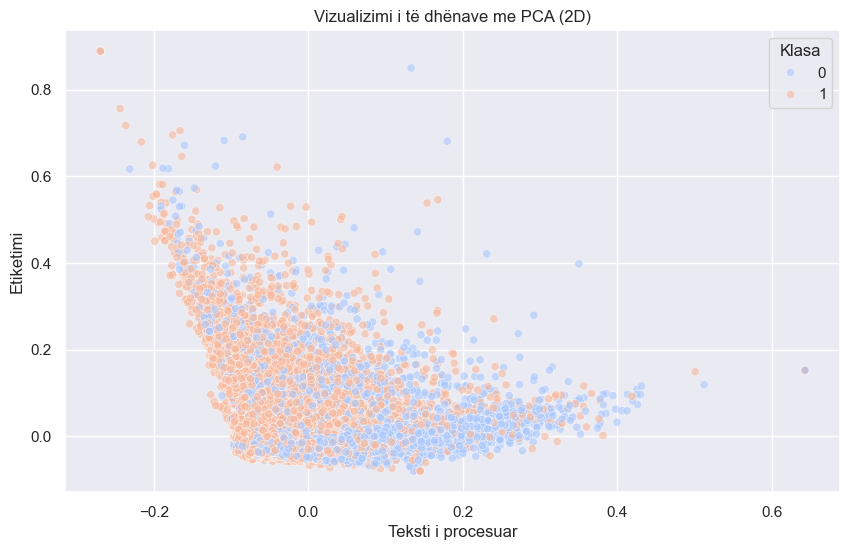

In [ ]:
vectorizer = TfidfVectorizer(max_features=50000)
X = vectorizer.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette="coolwarm", alpha=0.6)
plt.title("Vizualizimi i të dhënave me PCA (2D)")
plt.xlabel("Teksti i procesuar")
plt.ylabel("Etiketimi")
plt.legend(title='Klasa', loc='best')
plt.grid(True)
plt.show()


In [4]:
# vectorize x (TF-IDF)
vector = TfidfVectorizer(stop_words='english', ngram_range=(1,3), max_features=50000)
X = vector.fit_transform(X)


In [5]:
# split into sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [16]:
lr_model = LogisticRegression(max_iter=1000, C=1.0, class_weight='balanced')
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3926
           1       0.85      0.79      0.82      4281

    accuracy                           0.82      8207
   macro avg       0.82      0.82      0.82      8207
weighted avg       0.82      0.82      0.82      8207



In [13]:
from sklearn.metrics import classification_report

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

print("Train Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))


Train Set Performance:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     13954
           1       0.91      0.88      0.89     14769

    accuracy                           0.89     28723
   macro avg       0.89      0.89      0.89     28723
weighted avg       0.89      0.89      0.89     28723

Test Set Performance:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82      5921
           1       0.85      0.80      0.82      6389

    accuracy                           0.82     12310
   macro avg       0.82      0.82      0.82     12310
weighted avg       0.82      0.82      0.82     12310



In [15]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='f1')
print("Mean F1-Score:", scores.mean())


Mean F1-Score: 0.7644183973931791


In [ ]:
text = input("Enter here")
text_input_tfidf = vector.transform([text])
y_pred = lr_model.predict(text_input_tfidf)

if y_pred == 0:
    print("Non-hate")
else:
    print('Hate') 

In [15]:
from sklearn.metrics import precision_recall_curve

y_probs = lr_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

best_threshold = thresholds[(precisions >= recalls).argmax()]
y_pred_adjusted = (y_probs >= best_threshold).astype(int)

print("Adjusted Threshold:", best_threshold)
print(classification_report(y_test, y_pred_adjusted))


Adjusted Threshold: 0.4716202242296907
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      5921
           1       0.83      0.83      0.83      6389

    accuracy                           0.82     12310
   macro avg       0.82      0.82      0.82     12310
weighted avg       0.82      0.82      0.82     12310



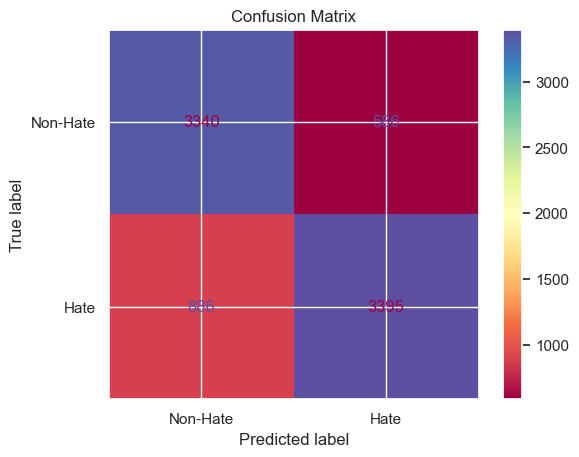

In [15]:

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


In [11]:
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Performance:")
print(classification_report(y_test, y_pred_svm))


SVM Performance:
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      3926
           1       0.86      0.81      0.83      4281

    accuracy                           0.83      8207
   macro avg       0.83      0.83      0.83      8207
weighted avg       0.83      0.83      0.83      8207



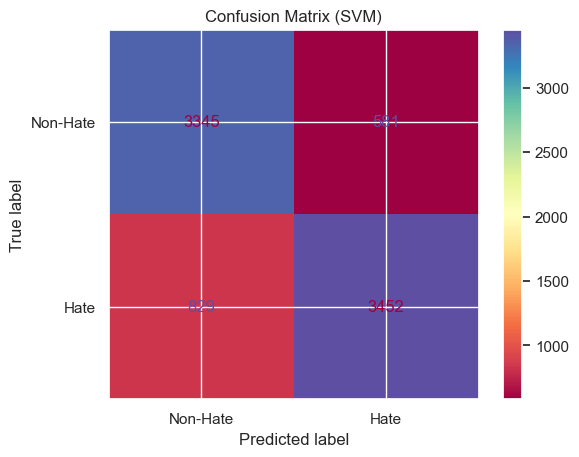

In [12]:

cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix (SVM)")
plt.show()


In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Performance:\n", classification_report(y_test, y_pred_rf))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81      3926
           1       0.85      0.75      0.80      4281

    accuracy                           0.80      8207
   macro avg       0.81      0.81      0.80      8207
weighted avg       0.81      0.80      0.80      8207



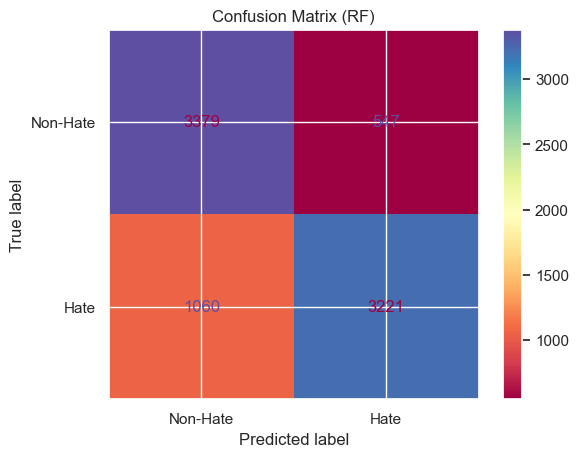

In [9]:

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hate', 'Hate'])
disp.plot(cmap='Spectral', values_format='d', ax=plt.gca())
plt.title("Confusion Matrix (RF)")
plt.show()


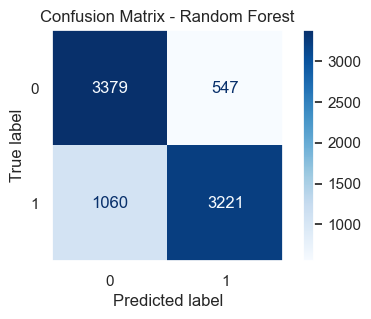

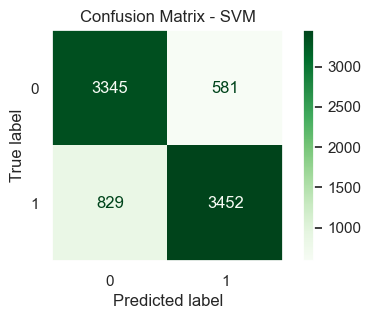

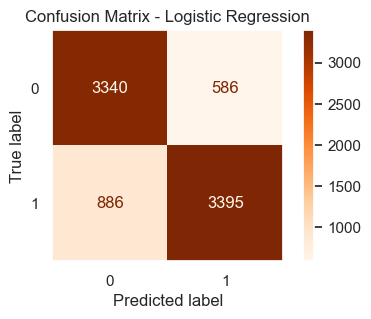

In [28]:
fig, ax = plt.subplots(figsize=(5, 3))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, cmap='Blues', ax=ax)
ax.grid(False)
ax.set_title("Confusion Matrix - Random Forest")
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, cmap='Greens', ax=ax)
ax.grid(False)
ax.set_title("Confusion Matrix - SVM")
plt.show()

fig, ax = plt.subplots(figsize=(5, 3))
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, cmap='Oranges', ax=ax)
ax.grid(False)
ax.set_title("Confusion Matrix - Logistic Regression")
plt.show()

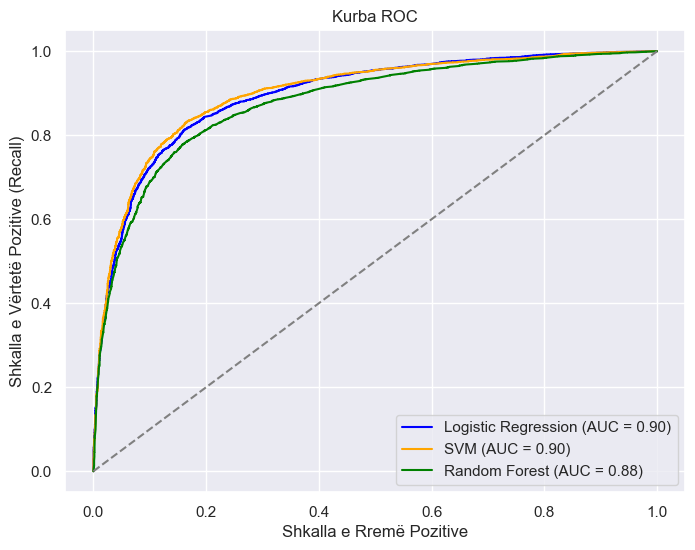

In [14]:
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]  # Logistic Regression
y_prob_svm = svm_model.decision_function(X_test)  # SVM (direct decision function)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Random Forest

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})', color='orange')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='green')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel("Shkalla e Rremë Pozitive")
plt.ylabel("Shkalla e Vërtetë Pozitive (Recall)")
plt.title("Kurba ROC")
plt.legend(loc='lower right')
plt.show()
